In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR

In [ ]:
# Wczytanie danych z pliku CSV
df = pd.read_csv('data/anime_data.csv')

# Podział danych na zmienne niezależne (cechy) i zmienną zależną (wynik)
X = df.drop('score', axis=1)  # Zmienne niezależne (cechy)
y = df['score']  # Zmienna zależna (wynik)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Inicjalizacja modeli regresji
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("SVR",SVR())
]

# Inicjalizacja list do przechowywania statystyk
train_mse_scores = []
train_rmse_scores = []
train_r2_scores = []
test_mse_scores = []
test_rmse_scores = []
test_r2_scores = []

for name, model in models:
    model.fit(X_train, y_train)  # Dopasowanie modelu do danych treningowych
    
    # Przewidywanie wartości na zbiorze treningowym i testowym
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Obliczenie metryk dla zbioru treningowego
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Obliczenie metryk dla zbioru testowego
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Dodanie statystyk do list
    train_mse_scores.append(train_mse)
    train_rmse_scores.append(train_rmse)
    train_r2_scores.append(train_r2)
    test_mse_scores.append(test_mse)
    test_rmse_scores.append(test_rmse)
    test_r2_scores.append(test_r2)
    
    # Wydrukowanie statystyk dla danego modelu
    print(f'{name}:')
    print('Train Mean Squared Error (MSE):', train_mse)
    print('Train Root Mean Squared Error (RMSE):', train_rmse)
    print('Train R^2 Score:', train_r2)
    print('Test Mean Squared Error (MSE):', test_mse)
    print('Test Root Mean Squared Error (RMSE):', test_rmse)
    print('Test R^2 Score:', test_r2)
    print('-' * 50)


# Wykresy statystyk

Linear Regression:
Train Mean Squared Error (MSE): 0.12197321572250479
Train Root Mean Squared Error (RMSE): 0.34924664024512075
Train R^2 Score: 0.8290617858271451
Test Mean Squared Error (MSE): 0.13900400965337775
Test Root Mean Squared Error (RMSE): 0.3728324149713618
Test R^2 Score: 0.8009869251723716
--------------------------------------------------
Decision Tree:
Train Mean Squared Error (MSE): 1.1355963126981936e-33
Train Root Mean Squared Error (RMSE): 3.3698609952017217e-17
Train R^2 Score: 1.0
Test Mean Squared Error (MSE): 0.17585009596928983
Test Root Mean Squared Error (RMSE): 0.4193448413529011
Test R^2 Score: 0.7482341092544771
--------------------------------------------------
Random Forest:
Train Mean Squared Error (MSE): 0.011071557653550846
Train Root Mean Squared Error (RMSE): 0.10522146954662269
Train R^2 Score: 0.9844838698217531
Test Mean Squared Error (MSE): 0.07541133460652598
Test Root Mean Squared Error (RMSE): 0.27461124268049547
Test R^2 Score: 0.892033031

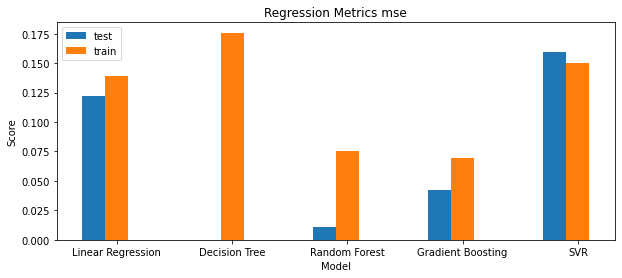

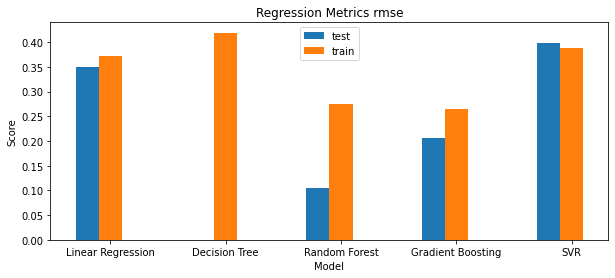

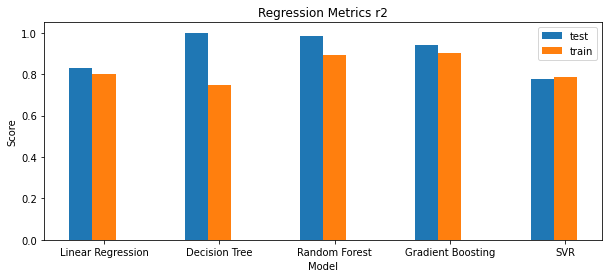

In [29]:
for test_scores,train_scores, name in [[train_mse_scores,test_mse_scores, "mse"], [train_rmse_scores, test_rmse_scores, 'rmse'], [train_r2_scores, test_r2_scores, "r2"]]:
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    x = np.arange(len(models))

    ax.bar(x, test_scores, width=0.2, label='test')
    ax.bar(x + 0.2, train_scores, width=0.2, label='train')
    # ax.bar(x + 0.4, r2_scores, width=0.2, label='R^2')

    ax.set_xticks(x + 0.2)
    ax.set_xticklabels([name for name, _ in models])
    ax.set_xlabel('Model')
    ax.set_ylabel('Score')
    ax.set_title('Regression Metrics ' + name)

    ax.legend()
    plt.show()

2605